In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from array import *

In [2]:
# reading and shuffling the data

df = pd.read_csv("FoDS-A1.csv")
df = df.sample(frac = 1)

In [3]:
# normalising the data values

myData = (df - df.min()) / (df.max() - df.min())
X = myData.iloc[:, :-1]
y = myData.iloc[:, -1:]

In [4]:
# splitting the dataset into training data and testing data

splitData = int(0.7 * len(myData))
train_X, test_X, train_y, test_y = X[:splitData], X[splitData:], y[:splitData], y[splitData:]

iter_value = 200
iter_value += 1
skip_num=10
iter_scaled= int(((iter_value-1)/skip_num)+1)
coeff_list = np.zeros((10, 10, 10))
error_array = np.zeros((10, iter_scaled))

In [ ]:
def randomiseMatrix(deg):
    A = np.zeros((deg+1, deg+1))
    for m in range(deg+1):
            for n in range(deg+1-m):
                A[m][n] = np.random.randn()              # assigning random values for weights
    return A            
    

In [5]:
def stocasticGD(deg, X, y, learning_rate, iterations):
    
    A = randomiseMatrix(deg)
                
    for itr in range(iterations):
        sumItrError = 0
        
        for z in range(len(X)):                 # for each row in input data
            row = X.iloc[z]                           # contains strength, temperature
            column = y.iloc[z]                    # contains pressure
            
            dotP_wx = 0                              # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dotP_wx += A[m][n] * (row[0]**m) * (row[1]**n)                                                     # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dotP_wx -= column[0]                                                                                                                  # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) 
                
             # for each parameter(w0,w1,w2,...)    
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):           # power of x2
                    A[m][n] -= (learning_rate/len(X)) * dotP_wx * (row[0]**m) * (row[1]**n)       # calculating w0,w1,w2,... for each iteration
                    
            sumItrError +=  (dotP_wx**2)*0.5  
        
        if(itr%skip_num == 0):
            index = int(itr/skip_num)
            error_array[deg][index] = sumItrError
        
        if(itr == iterations - 1):
            print("Error of last iteration of degree ", deg, " :  " ,sumItrError)
            
            for m in range(deg+1):                 
                for n in range(deg+1-m):
                    coeff_list[deg][m][n] = A[m][n]
    return sumItrError

		Error of last iteration of degree  0  :   67.27746687129333

Error values after each 10 complete iterations : 
[161.53630314113803, 67.28269414252526, 67.27747355056106, 67.27746691495788, 67.27746687158711, 67.27746687129522, 67.27746687129333, 67.27746687129333, 67.27746687129333, 67.27746687129333, 67.27746687129333, 67.27746687129333, 67.27746687129333, 67.27746687129333, 67.27746687129333, 67.27746687129333, 67.27746687129333, 67.27746687129333, 67.27746687129333, 67.27746687129333, 67.27746687129333]


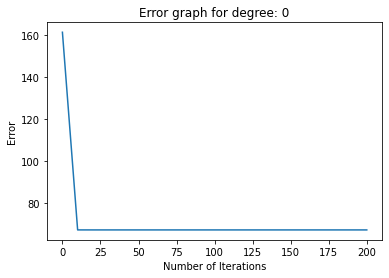

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
		Error of last iteration of degree  1  :   13.457361051332068

Error values after each 10 complete iterations : 
[2266.0162733837396, 16.535249778698006, 15.057911365137327, 14.41690088844721, 14.122129850604102, 13.971714830349576, 13.882722958742637, 13.820995756979135, 13.772378583455689, 13.730926048614709, 13.694066944509384, 13.660622107155367, 13.629991666453487, 13.601821547645876, 13.575866351053495, 13.55193268724673, 13.529855474936825, 13.509487751926338, 13.490696038282437, 13.473357995582852, 13.457361051332068]


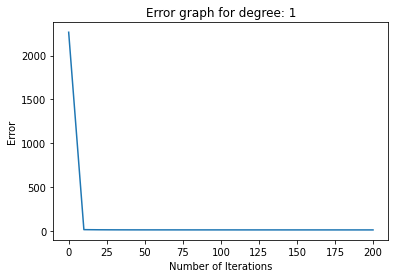

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
		Error of last iteration of degree  2  :   25.28675832392969

Error values after each 10 complete iterations : 
[437.5514064813817, 159.34593051052576, 123.74750468459601, 105.45456855597806, 91.89717685350348, 80.76710042650173, 71.43150916736296, 63.565747158219615, 56.92988868885286, 51.327536986879764, 46.594455602746066, 42.59272110593022, 39.20640631626393, 36.33805111363564, 33.90571356854077, 31.84049483541961, 30.084459601384285, 28.58888841287668, 27.312808787472054, 26.221760594778896, 25.28675832392969]


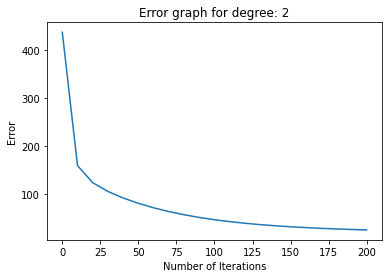

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
		Error of last iteration of degree  3  :   17.185587849897566

Error values after each 10 complete iterations : 
[1643.9294936845129, 83.17700319072274, 62.000607413021406, 50.821583549281684, 42.69757411322497, 36.58156058626544, 31.956833337886966, 28.452722407701657, 25.791815268385694, 23.765667582098, 22.21758004764068, 21.029732279194892, 20.113522274570215, 19.40230834821741, 18.845955358332734, 18.406736455977523, 18.056253301126308, 17.773121532460053, 17.541231248653048, 17.348439564987622, 17.185587849897566]


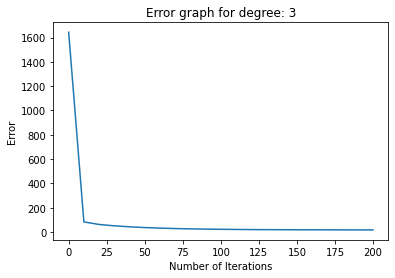

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
		Error of last iteration of degree  4  :   29.435077283059275

Error values after each 10 complete iterations : 
[287.5068784775293, 135.8913348617834, 103.68648217860469, 83.37915882726274, 69.34571272843152, 59.49985489834906, 52.49257607097584, 47.421465178995035, 43.68026723309524, 40.86009016789655, 38.683873812444055, 36.962868529151436, 35.56768368632146, 34.40898766262029, 33.42460908985564, 32.57089022692341, 31.81687020034723, 31.140355798424075, 30.525254635599634, 29.959755220336472, 29.435077283059275]


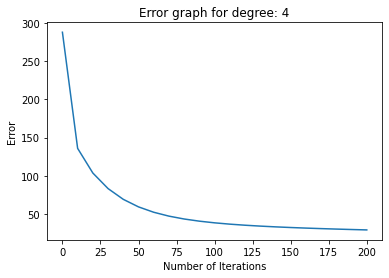

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
		Error of last iteration of degree  5  :   20.671522083613564

Error values after each 10 complete iterations : 
[746.9072516191894, 87.87349405758175, 63.05389037456212, 49.79396732290712, 41.49671527875123, 36.14401879480167, 32.576938460564755, 30.109292702891512, 28.33051608328147, 26.9921824869076, 25.94205989353103, 25.085536784197018, 24.362893289763235, 23.73579452627885, 23.17918589618096, 22.67637643116744, 22.21602003147465, 21.790237821046578, 21.39343426054507, 21.02154019695348, 20.671522083613564]


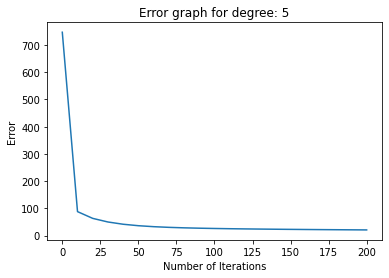

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
		Error of last iteration of degree  6  :   16.337243930699763

Error values after each 10 complete iterations : 
[269.7864905019627, 56.48751948069823, 37.96360304316651, 29.240079488826346, 24.733211436537662, 22.298011859049044, 20.89521074500202, 20.016263625287483, 19.41037292241494, 18.952567167344217, 18.579692407858076, 18.2592131400858, 17.973917348158732, 17.714363493684374, 17.47511650205944, 17.252850754789755, 17.045380862039032, 16.851158302669496, 16.669004942792895, 16.497968793461123, 16.337243930699763]


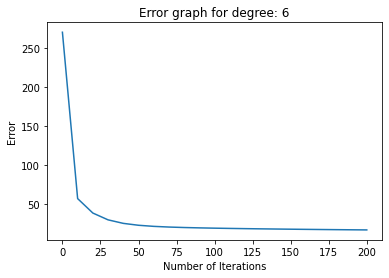

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
		Error of last iteration of degree  7  :   18.75671592811787

Error values after each 10 complete iterations : 
[1647.1438223331102, 84.52380502215938, 56.0103042374424, 40.30202322955449, 31.543878916286648, 26.62072192933412, 23.8206269545912, 22.1992773415832, 21.234301614566785, 20.63611687739878, 20.24391740686071, 19.968276284155735, 19.759387419801424, 19.589460990623735, 19.442951379630962, 19.31112756766308, 19.18905420000766, 19.073912165148123, 18.964063972066313, 18.85853343968798, 18.75671592811787]


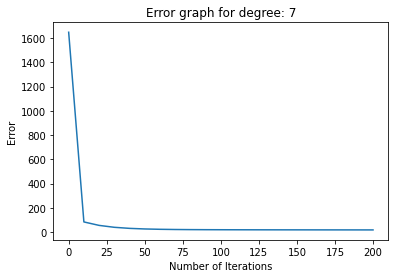

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
		Error of last iteration of degree  8  :   30.47625408988837

Error values after each 10 complete iterations : 
[481.03461037898643, 89.3532782072375, 81.53160488890693, 75.40790071629239, 70.14373515942222, 65.49898006794272, 61.33880268676848, 57.58099949222794, 54.1705830227357, 51.067214685257774, 48.238932137768714, 45.658969213347, 43.30409997571266, 41.153738103687495, 39.18941433464683, 37.39444646694637, 35.75371039028903, 34.25346669331802, 32.88122002418521, 31.625599515704163, 30.47625408988837]


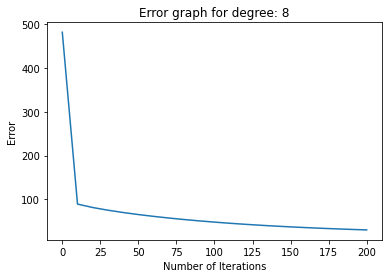

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
		Error of last iteration of degree  9  :   22.437744472846482

Error values after each 10 complete iterations : 
[1883.6853396912513, 94.91211752396826, 67.7126266311293, 54.98637486969416, 47.949127416764874, 43.51049258073813, 40.328021762718336, 37.81042500813074, 35.690694855528655, 33.84256108067143, 32.20146074581605, 30.730435181383065, 29.405352789950882, 28.208453259122546, 27.12548104710623, 26.144372201716045, 25.254617891139464, 24.446926659230492, 23.713021972957826, 23.045504011517412, 22.437744472846482]


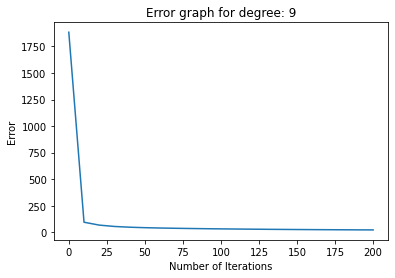

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Degree  1  gives minimum error.


In [6]:
#For training data

minError = 100000
minErrorDeg = -1
x_axis=[]

for i in range(iter_scaled):
    x_axis.append(i*skip_num)
    
for i in range(10):
    SGD_Error = stocasticGD(i, train_X, train_y, 0.5, iter_value)
    if(SGD_Error <= minError):
        minError = SGD_Error
        minErrorDeg = i
    
    error_list = error_array[i].tolist()
    print("\nError values after each 10 complete iterations : ")
    print(error_list)
    
    plt.plot(x_axis, error_list)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Error')
    title = "Error graph for degree: " + str(i)
    plt.title(title)
    plt.show()
    print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    error_list=error_array[i].tolist()
    
print("Degree ", minErrorDeg, " gives minimum error.")      


In [7]:
def testing_SGD(deg, X, y, iterations):
                
    for itr in range(iterations):
        sumItrError = 0
        
        for z in range(len(X)):             # for each row in input data
            row = X.iloc[z]                       # contains strength, temperature
            column = y.iloc[z]                 # contains pressure
            
            dotP_wx = 0                          # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dotP_wx += coeff_list[deg][m][n] * (row[0]**m) * (row[1]**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dotP_wx = column[0] - dotP_wx                   # (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) - yn
            sumItrError +=  (dotP_wx**2)*0.5  
            
        if(itr == iterations - 1):
            print("Error of last iteration of degree ", deg, " :  " ,sumItrError)
            
    return sumItrError

In [8]:
# for testing data

minError = 100000
minErrorDeg = -1
print("Testing errors for various degrees are as follows:")

for i in range(10):
    SGD_Error = testing_SGD(i, test_X, test_y, iter_value)    
    if(SGD_Error <= minError):
        minError = SGD_Error
        minErrorDeg = i
        
print("Degree ", minErrorDeg, " gives minimum testing error. \nMinimum testing error = ", minError) 

Testing errors for various degrees are as follows:
Error of last iteration of degree  0  :   29.005736816027873
Error of last iteration of degree  1  :   6.041587779584007
Error of last iteration of degree  2  :   10.989506937492303
Error of last iteration of degree  3  :   7.50856866990002
Error of last iteration of degree  4  :   12.168621784045047
Error of last iteration of degree  5  :   8.909973320029366
Error of last iteration of degree  6  :   7.156206447707383
Error of last iteration of degree  7  :   7.763341010565433
Error of last iteration of degree  8  :   13.509957965917051
Error of last iteration of degree  9  :   9.875828726676822
Degree  1  gives minimum testing error. 
 Minimum testing error =  6.041587779584007
